<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/train_%26_test_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A6%AC%EB%B7%B0_%EC%9E%91%EC%97%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 훈련 데이터 
#### 셀레니움으로 긁어온 훈련 데이터 입니다.
> 간단하게 데이터를 정제합니다.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import csv

In [52]:
url = '/content/drive/MyDrive/add_comment_people_count.csv'

In [53]:
df1 = pd.read_csv(url, encoding = 'utf-8')

In [54]:
df1

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,naver_store_url,store_address,store_score,visitor_review,total_of_people_voted,리뷰 총인원
0,차오차오,중식,중국음식/중국집,중식 음식점업,별내동,37.646871,127.122472,별내동%20차오차오,https://m.place.naver.com/restaurant/34707895,경기 남양주시 별내중앙로57번길 20,4.27,/정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?/몇 짐을 돌아...,/4.27/301개 평점 247명 참여,126
1,카페947,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.659029,127.126545,별내동%20카페947,https://m.place.naver.com/restaurant/37006075,경기 남양주시 두물로27번길 38-16 1층,4.43,/콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 ...,/4.43/582개 평점 553명 참여,293
2,고양이부엌별내,분식,라면김밥분식,분식 및 김밥 전문점,별내동,37.655812,127.126594,별내동%20고양이부엌별내,https://m.place.naver.com/restaurant/1707907230,경기 남양주시 두물로 19,4.11,/주변에 있길래 갔었는데 만족입니다!/콩나물이 푸짐했어요! 그리고 맛이 조금 다른 ...,/4.11/118개 평점 92명 참여,46
3,강북민물장어,일식/수산물,민물장어전문,한식 음식점업,별내동,37.649698,127.106664,별내동%20강북민물장어,https://m.place.naver.com/restaurant/35425415,경기 남양주시 불암산로 63,4.25,/장어 실하고 맛있어용 ! 가성비 최고 ! 글구 추가로.. 사장님...! 바쁘시더라...,/4.25/117개 평점 139명 참여,63
4,던킨도너츠,패스트푸드,도너츠전문,제과점업,별내동,37.645689,127.125953,별내동%20던킨도너츠,https://m.place.naver.com/restaurant/1383790241,경기 남양주시 별내중앙로 26,4.50,/저렴하구 맛있어용 던킨최고/너무친절한사장님과직원들 늘 너무깨끗한매장 당충전에 딱좋...,/4.5/644개 평점 481명 참여,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,카페나라,한식,한식/백반/한정식,한식 음식점업,인계동,37.275730,127.024661,인계동%20카페나라,https://m.place.naver.com/restaurant/1168414481,경기 수원시 팔달구 중부대로 80,NaN,/ㆍ/좋아요/아파트 상가에 예쁜 카페가 생겨서 좋아요! 요청 사항도 잘 들어 주시고...,NaN,4
1506,돈돼지복돼지,한식,한식/백반/한정식,한식 음식점업,인계동,37.267134,127.031254,인계동%20돈돼지복돼지,https://m.place.naver.com/restaurant/1989394215,경기 수원시 권선구 세권로 246,NaN,NaN,NaN,3
1507,갈비홀릭,한식,한식/백반/한정식,한식 음식점업,인계동,37.257657,127.033709,인계동%20갈비홀릭,https://m.place.naver.com/restaurant/1356271323,경기 수원시 팔달구 권선로 753,NaN,NaN,NaN,2
1508,백소정,일식/수산물,음식점-일식,일식 음식점업,인계동,37.263596,127.031615,인계동%20백소정,https://m.place.naver.com/restaurant/1414400622,경기 수원시 팔달구 효원로265번길 36 102호,4.87,/진인짜 맛있어요!/젓가락 숟가락이 금색이고 포장도 되어있어 청결하다는 인상을 받았...,"/4.87/818개 평점 1,757명 참여","2,852"


In [55]:
df1.columns

Index(['상호명', '업종중분류명', '업종소분류명', '표준산업분류명', '행정동명', '위도', '경도', '네이버키워드',
       'naver_store_url', 'store_address', 'store_score', 'visitor_review',
       'total_of_people_voted', '리뷰 총인원'],
      dtype='object')

In [56]:
# 컬럼명 변경

df1 = df1.rename(columns={'naver_store_url':'가게_URL',
                      'store_address':'가게_주소',
                      'store_score':'가게_평점',
                      'total_of_people_voted':'평점에_참여한_인원',
                      'visitor_review':'방문자_리뷰',
                      '리뷰 총인원':'리뷰_총인원'})

In [57]:
df1.columns

Index(['상호명', '업종중분류명', '업종소분류명', '표준산업분류명', '행정동명', '위도', '경도', '네이버키워드',
       '가게_URL', '가게_주소', '가게_평점', '방문자_리뷰', '평점에_참여한_인원', '리뷰_총인원'],
      dtype='object')

In [58]:
#--------------------------- 특정 컬럼의 결측치 처리 ---------------------------
df1['가게_평점'] = df1['가게_평점'].fillna(0)


#------------------------- 특정 컬럼 : '리뷰 총인원'에서 나와있는 특정 문자값인 empty를 0으로 대체 ------------
df1 = df1.replace({'리뷰_총인원':'empty'},0)

df1['리뷰_총인원'] = df1['리뷰_총인원'].str.replace(',', '')

In [59]:
#결측치의 개수 찾기.
df1['리뷰_총인원'].isnull().sum() # 총 67개

# 결측치의 위치 확인
df1[df1['리뷰_총인원'].isnull()]

# 결측값 0으로 채우기
df1['리뷰_총인원'].fillna(0,inplace=True)

#------------------------- 특정 컬럼 : '리뷰 총인원' 데이터 형태를 문자열 -> 숫자형으로 변경------------
df1 = df1.astype({'리뷰_총인원':'int'})

In [60]:

#---------- df['평점에_참여한_인원']의 값은 현재 평점과, 숫자와 한글이 혼합되어 있는 상태, 수정하여 필요한 값만 사용하기.--------
#  Ex : /4.35/206개 평점 192명 참여 -> 192을 제외한 나머지 값 모두 제거.

# 1. 슬래시에서 가장 오른쪽에 있는 데이터를 제외하고 모두 제거.
df1['평점에_참여한_인원'] = df1['평점에_참여한_인원'].str.split('/').str[2] 
#[변경 전] /4.35/206개 평점 192명 참여
#[변경 후] 206개 평점 192명 참여 

# 2.  공백기준으로 다시 한 번 필요한 데이터만 추출.
df1['평점에_참여한_인원'] = df1['평점에_참여한_인원'].str.split(' ').str[2]
#[변경 전] 206개 평점 192명 참여
#[변경 후] 192명


# 3. 정규식을 이용하여 한글 '명' 제거.
df1['평점에_참여한_인원'] = df1['평점에_참여한_인원'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl= r'', regex=True)

# 4. 데이터에 존재하는 특수문자 ',' 제거 및 결측치 채우기(0), 이후 데이터의 형태 변경.
df1['평점에_참여한_인원'] = df1['평점에_참여한_인원'].str.replace(',','').fillna(0).astype({'평점에_참여한_인원':'int'})


df1['방문자_리뷰'] =df1['방문자_리뷰'].fillna('없음') 

In [61]:
df1['평점에_참여한_인원']

0        247
1        553
2         92
3        139
4        481
        ... 
1505       0
1506       0
1507       0
1508    1757
1509      22
Name: 평점에_참여한_인원, Length: 1510, dtype: int64

In [62]:
# 한번 사용한 이후 잠구도록 합니다!

!pip install category_encoders
!pip install pandas-profiling==2.11.0 --upgrade
!pip install markupsafe
!pip install --user --upgrade aws-sam-cli


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
#프로파일링 패키지 불러오기.
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
#'방문자_리뷰'열의 중복 값 확인하기
duplicated_data = df1[df1.duplicated('방문자_리뷰')]

# 특정 값의 컬럼 제거.
idx = duplicated_data[duplicated_data['방문자_리뷰'] == '없음'].index

duplicated_data.drop(idx, inplace=True)

#데이터 확인
duplicated_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/37227045,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/37227045,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
73,쮸쮸,패스트푸드,아이스크림판매,제과점업,별내동,37.657352,127.116761,별내동%20쮸쮸,https://m.place.naver.com/restaurant/1291405463,경기 남양주시 별내3로 249 별사랑마을아파트 상가동,4.30,/좋아욤/굿/굿/좋아요/둣/좋아요/굿/굿/좋아요~!!/다양해요,114,117
85,전주명가24시콩나물국밥,한식,한식/백반/한정식,한식 음식점업,별내동,37.645885,127.125668,별내동%20전주명가24시콩나물국밥,https://m.place.naver.com/restaurant/849335920,경기 남양주시 별내중앙로 30 타요빌딩 로데오몰 1층,4.19,/김치콩나물해장국이 진짜 맛있었어요ㆍ/24시간 전주콩나물국밥집 가성비도 좋지만 역시...,388,146
97,이치마루,양식,정통양식/경양식,서양식 음식점업,별내동,37.647976,127.123365,별내동%20이치마루,https://m.place.naver.com/restaurant/615589938,경기 남양주시 별내중앙로 64 2층,0.00,/일요일 오후 포장주문입니다 재료가 딱봐도 신선하고 연어는 생물을 직접 떠서 해주시...,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,얌샘,분식,라면김밥분식,분식 및 김밥 전문점,인계동,37.275730,127.024661,인계동%20얌샘,https://m.place.naver.com/restaurant/1956093434,경기 수원시 팔달구 중부대로 80 (상가1동 6호),4.25,/탕수육은 냉동인데 그거빼고 괜찮아요/친절하고 맛있어요 땡초멸치김밥 맛있어요/여기 ...,132,83
1488,쌍팔,중식,중국음식/중국집,중식 음식점업,인계동,37.266550,127.023776,인계동%20쌍팔,https://m.place.naver.com/restaurant/1224142375,경기 수원시 팔달구 권광로180번길 46,4.23,/고기도 맛있지만 청국장 맛잇어요ㅠㅠㅠ/냉동삼겹살 맛있었어요! 다만 찌개가 7천원라...,66,27
1492,교동짬뽕,중식,중국음식/중국집,중식 음식점업,인계동,37.274163,127.020328,인계동%20교동짬뽕,https://m.place.naver.com/restaurant/1922049581,경기 수원시 팔달구 중부대로34번길 24 1층,3.92,/좋아요/맛있어요!/별루예요/체인점마다 맛이 다르네요/굿/맛있어요/.,13,8
1500,봉평막국수,한식,한식/백반/한정식,한식 음식점업,인계동,37.276710,127.030872,인계동%20봉평막국수,https://m.place.naver.com/restaurant/18211609,경기 수원시 팔달구 경수대로 572,4.59,/막국수 매니안데 찐맛집이예요 여주식? 막국수처럼 진한양념인데 양념맛이 최고 같이나...,68,45


#### 문제점 발견.
>A. 같은 상호지만, 분명 다른 위치에 존재하는 가게가 존재함에도 불구하고, 리뷰, url 등이 같음. <br>
B. 또는 완전 다른 가게임에도 불구하고 리뷰가 같이 작성된 부분 발견.

In [65]:
# 데이터를 전부 살펴보기 위해 생략 해제.
# 필요할 때에만 사용하기. (출력이 너무 길어지므로)

# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [66]:
# 다시 한 번 데이터 확인
# 이름이 너무 길어서 변수 변경
ddf = duplicated_data

ddf.head(4)
# 두번째 베스킨라빈스가 잘못되어 있었다. ->  정확한 가게명은 '배스킨라빈스 별내로데오점'

# 리뷰가 반복된 곳에서 잘못된 장소의 url을 정리하고, 다시 함수를 짜서 데이터를 크롤링한다.

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/37227045,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/37227045,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
73,쮸쮸,패스트푸드,아이스크림판매,제과점업,별내동,37.657352,127.116761,별내동%20쮸쮸,https://m.place.naver.com/restaurant/1291405463,경기 남양주시 별내3로 249 별사랑마을아파트 상가동,4.30,/좋아욤/굿/굿/좋아요/둣/좋아요/굿/굿/좋아요~!!/다양해요,114,117
85,전주명가24시콩나물국밥,한식,한식/백반/한정식,한식 음식점업,별내동,37.645885,127.125668,별내동%20전주명가24시콩나물국밥,https://m.place.naver.com/restaurant/849335920,경기 남양주시 별내중앙로 30 타요빌딩 로데오몰 1층,4.19,/김치콩나물해장국이 진짜 맛있었어요ㆍ/24시간 전주콩나물국밥집 가성비도 좋지만 역시...,388,146


In [67]:
ddf

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/37227045,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/37227045,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
73,쮸쮸,패스트푸드,아이스크림판매,제과점업,별내동,37.657352,127.116761,별내동%20쮸쮸,https://m.place.naver.com/restaurant/1291405463,경기 남양주시 별내3로 249 별사랑마을아파트 상가동,4.30,/좋아욤/굿/굿/좋아요/둣/좋아요/굿/굿/좋아요~!!/다양해요,114,117
85,전주명가24시콩나물국밥,한식,한식/백반/한정식,한식 음식점업,별내동,37.645885,127.125668,별내동%20전주명가24시콩나물국밥,https://m.place.naver.com/restaurant/849335920,경기 남양주시 별내중앙로 30 타요빌딩 로데오몰 1층,4.19,/김치콩나물해장국이 진짜 맛있었어요ㆍ/24시간 전주콩나물국밥집 가성비도 좋지만 역시...,388,146
97,이치마루,양식,정통양식/경양식,서양식 음식점업,별내동,37.647976,127.123365,별내동%20이치마루,https://m.place.naver.com/restaurant/615589938,경기 남양주시 별내중앙로 64 2층,0.00,/일요일 오후 포장주문입니다 재료가 딱봐도 신선하고 연어는 생물을 직접 떠서 해주시...,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,얌샘,분식,라면김밥분식,분식 및 김밥 전문점,인계동,37.275730,127.024661,인계동%20얌샘,https://m.place.naver.com/restaurant/1956093434,경기 수원시 팔달구 중부대로 80 (상가1동 6호),4.25,/탕수육은 냉동인데 그거빼고 괜찮아요/친절하고 맛있어요 땡초멸치김밥 맛있어요/여기 ...,132,83
1488,쌍팔,중식,중국음식/중국집,중식 음식점업,인계동,37.266550,127.023776,인계동%20쌍팔,https://m.place.naver.com/restaurant/1224142375,경기 수원시 팔달구 권광로180번길 46,4.23,/고기도 맛있지만 청국장 맛잇어요ㅠㅠㅠ/냉동삼겹살 맛있었어요! 다만 찌개가 7천원라...,66,27
1492,교동짬뽕,중식,중국음식/중국집,중식 음식점업,인계동,37.274163,127.020328,인계동%20교동짬뽕,https://m.place.naver.com/restaurant/1922049581,경기 수원시 팔달구 중부대로34번길 24 1층,3.92,/좋아요/맛있어요!/별루예요/체인점마다 맛이 다르네요/굿/맛있어요/.,13,8
1500,봉평막국수,한식,한식/백반/한정식,한식 음식점업,인계동,37.276710,127.030872,인계동%20봉평막국수,https://m.place.naver.com/restaurant/18211609,경기 수원시 팔달구 경수대로 572,4.59,/막국수 매니안데 찐맛집이예요 여주식? 막국수처럼 진한양념인데 양념맛이 최고 같이나...,68,45


In [68]:
# 중복된 값을 가진 잘못된 컬럼의 값 변경하기.


# 배스킨라빈스
ddf.at[41,'가게_URL'] = 'https://m.place.naver.com/restaurant/38461197'
ddf.at[63,'가게_URL'] = 'https://m.place.naver.com/restaurant/1949175123'
#411행의 베스킨라빈스는 별내북부점이다,  이값은 41번의 행에 존재하는 같은 동의 배스킨라빈스와 일치하므로 추후에 삭재한다. index => 411


#스타벅스
ddf.at[778,'가게_URL'] = 'https://m.place.naver.com/restaurant/1401281147'
ddf.at[785,'가게_URL'] = 'https://m.place.naver.com/restaurant/1446263639'
ddf.at[878,'가게_URL'] = 'https://m.place.naver.com/restaurant/35643998'
ddf.at[936,'가게_URL'] = 'https://m.place.naver.com/restaurant/1732270813'
ddf.at[1200,'가게_URL'] = 'https://m.place.naver.com/restaurant/1174053447'

#파리바게트
ddf.at[650,'가게_URL'] = 'https://m.place.naver.com/restaurant/17887684'

#엔제리너스
ddf.at[1295,'가게_URL'] = 'https://m.place.naver.com/restaurant/1994608945'
ddf.at[1399,'가게_URL'] = 'https://m.place.naver.com/restaurant/32005167'


# 이디야 커피
ddf.at[175,'가게_URL'] = 'https://m.place.naver.com/restaurant/38461197'
ddf.at[243,'가게_URL'] = 'https://m.place.naver.com/restaurant/36252488'
ddf.at[359,'가게_URL'] = 'https://m.place.naver.com/restaurant/33705592'
ddf.at[378,'가게_URL'] = 'https://m.place.naver.com/restaurant/1961741615'
ddf.at[404,'가게_URL'] = 'https://m.place.naver.com/restaurant/36090806'
ddf.at[626,'가게_URL'] = 'https://m.place.naver.com/restaurant/31316576'
ddf.at[841,'가게_URL'] = 'https://m.place.naver.com/restaurant/1094293017'
ddf.at[1395,'가게_URL'] = 'https://m.place.naver.com/restaurant/20084073'


#멕시카나치킨
# 689번 행에 존재하는 멕시카나 치킨은 망함(현재 존재하지 않는 정보) 추후에 삭제해야한다.
# 728번 행에 존재하는 멕시카나 치킨 또한 존재하지 않는다, 고로 추후에 삭제해야 한다.

# 특이사항 정리

# 가게 이름 표기 및 가게 url 정보 잘못됨.
ddf.at[449,'상호명'] = '카페인별내'
ddf.at[449,'가게_URL'] = 'https://m.place.naver.com/restaurant/1614103843'

ddf.at[590,'상호명'] = '홍종흔베이커리'
ddf.at[590,'업종소분류명'] = '제과점'	
ddf.at[590,'표준산업분류명'] = '제과점업'
ddf.at[590,'업종중분류명'] = '제과제빵떡케익'
ddf.at[590,'가게_URL'] = 'https://m.place.naver.com/restaurant/1671262980'


# 위치 및 정보를 찾을 수 없는 가게의 '행'정보
# 73행 삭제  ---가게 존재 x

# 288행 삭제
# 307행 삭제

# 350행 삭제
# 370행 삭제
# 411행 삭제
# 617행 삭제
# 654행 삭제
# 689행 삭제
# 698행 삭제
# 728행 삭제
# 732행 삭제
# 762행 삭제
# 838행 삭제

# 876행 삭제
# 881행 삭제
# 884행 삭제
# 996행 삭제
# 1009행 삭제
# 1018행  삭제
# 1036 행 삭제할 것 
# 1056 행 또한 삭제할 것 
# 1143 행 삭제
# 1126 행 삭제
# 1159 행 삭제
# 1303 행 삭제
# 1357 행 삭제
# 1383 행 삭제
# 1401 행 삭제
# 1408 행 삭제


# 페리카나
# 1357 행 삭제 --> 페리카나 존재하지 않음
# 881 행 삭제 ---> 페리카나 존재하지 않음
# --- 인계동에 존재하는 모든 페리카나의 위도와 경도명은 잘못되어 있다.


# 맥도날드
ddf.at[1260,'상호명'] = '맥도날드 수원인계DT점'
ddf.at[1260,'가게_URL'] = 'https://m.place.naver.com/restaurant/1930215589'

ddf.at[1260,'상호명'] = '구이구이계란말이'
ddf.at[1365,'가게_URL'] = 'https://m.place.naver.com/restaurant/32721004'

ddf.at[1389,'상호명'] = '오늘도'
ddf.at[1389,'가게_URL'] = 'https://m.place.naver.com/restaurant/1920009299'


ddf.at[1488,'상호명'] = '쌍팔반점 인계점' 
ddf.at[1488,'가게_URL'] = 'https://m.place.naver.com/restaurant/1081756240'


# 한양맛집
ddf.at[1501,'상호명'] = '순두부마을'
ddf.at[1501,'가게_URL'] = 'https://m.place.naver.com/restaurant/18207486'

ddf.at[125,'상호명'] = '투썸플레이스'
ddf.at[125,'가게_URL'] = 'https://m.place.naver.com/restaurant/36849400'



ddf.at[714,'가게_URL'] = 'https://m.place.naver.com/restaurant/31613951'

ddf.at[846,'가게_URL'] = 'https://m.place.naver.com/restaurant/38009859'

In [69]:
ddf

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/38461197,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/1949175123,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398
73,쮸쮸,패스트푸드,아이스크림판매,제과점업,별내동,37.657352,127.116761,별내동%20쮸쮸,https://m.place.naver.com/restaurant/1291405463,경기 남양주시 별내3로 249 별사랑마을아파트 상가동,4.30,/좋아욤/굿/굿/좋아요/둣/좋아요/굿/굿/좋아요~!!/다양해요,114,117
85,전주명가24시콩나물국밥,한식,한식/백반/한정식,한식 음식점업,별내동,37.645885,127.125668,별내동%20전주명가24시콩나물국밥,https://m.place.naver.com/restaurant/849335920,경기 남양주시 별내중앙로 30 타요빌딩 로데오몰 1층,4.19,/김치콩나물해장국이 진짜 맛있었어요ㆍ/24시간 전주콩나물국밥집 가성비도 좋지만 역시...,388,146
97,이치마루,양식,정통양식/경양식,서양식 음식점업,별내동,37.647976,127.123365,별내동%20이치마루,https://m.place.naver.com/restaurant/615589938,경기 남양주시 별내중앙로 64 2층,0.00,/일요일 오후 포장주문입니다 재료가 딱봐도 신선하고 연어는 생물을 직접 떠서 해주시...,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,얌샘,분식,라면김밥분식,분식 및 김밥 전문점,인계동,37.275730,127.024661,인계동%20얌샘,https://m.place.naver.com/restaurant/1956093434,경기 수원시 팔달구 중부대로 80 (상가1동 6호),4.25,/탕수육은 냉동인데 그거빼고 괜찮아요/친절하고 맛있어요 땡초멸치김밥 맛있어요/여기 ...,132,83
1488,쌍팔반점 인계점,중식,중국음식/중국집,중식 음식점업,인계동,37.266550,127.023776,인계동%20쌍팔,https://m.place.naver.com/restaurant/1081756240,경기 수원시 팔달구 권광로180번길 46,4.23,/고기도 맛있지만 청국장 맛잇어요ㅠㅠㅠ/냉동삼겹살 맛있었어요! 다만 찌개가 7천원라...,66,27
1492,교동짬뽕,중식,중국음식/중국집,중식 음식점업,인계동,37.274163,127.020328,인계동%20교동짬뽕,https://m.place.naver.com/restaurant/1922049581,경기 수원시 팔달구 중부대로34번길 24 1층,3.92,/좋아요/맛있어요!/별루예요/체인점마다 맛이 다르네요/굿/맛있어요/.,13,8
1500,봉평막국수,한식,한식/백반/한정식,한식 음식점업,인계동,37.276710,127.030872,인계동%20봉평막국수,https://m.place.naver.com/restaurant/18211609,경기 수원시 팔달구 경수대로 572,4.59,/막국수 매니안데 찐맛집이예요 여주식? 막국수처럼 진한양념인데 양념맛이 최고 같이나...,68,45


####얼추 정리가 완료된 것 같습니다❗
> 이제 우리가 해야할 일은 다음과 같습니다. <br/>

1.리뷰에 관련된 모든 컬럼 및 가게의 주소정보에 관하여 다시 최신화해야합니다
  <br/>
2.셀레니움을 이용 및 함수를 생성하여 일을 처리하여 봅시다.


#### 데이터 정제
> 인덱스 번호를 유지하는 것이 좋아보입니다.

* 인덱스 번호를 유지하는 것에 대한 장점 (사견)
* 현재 데이터상으로 잘못되어 있는 부분은 다음과 같다.<br/>
  * 컬럼: 네이버_키워드, 가게 url,  가게주소 및 평점, 방문자 리뷰, 평점에 참여한 인원, 평점에 참여한 인원 <br/>
  * 인덱스 번호가 저장되어 있다면 우리가 찾은 데이터를 맞는 인덱스에 그대로 저장할 수 있습니다.<br/>


❗ 네이버 키워드는 검색용이었습니다. 
-> 처음 셀레니움으로 데이터를 크롤링할 때 필요하여 설정한 컬럼명입니다.<br/>
-> 하지만 이후 이 컬럼은 중요하지 않습니다, 앞으로 지워줄 예정이므로 신경쓰지 않습니다.


In [70]:
# 데이터프레임의 인덱스를 컬럼에 추가
ddf['index'] = ddf.index

# 데이터프레임 확인
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원,index
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/38461197,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398,41
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/1949175123,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398,63
73,쮸쮸,패스트푸드,아이스크림판매,제과점업,별내동,37.657352,127.116761,별내동%20쮸쮸,https://m.place.naver.com/restaurant/1291405463,경기 남양주시 별내3로 249 별사랑마을아파트 상가동,4.30,/좋아욤/굿/굿/좋아요/둣/좋아요/굿/굿/좋아요~!!/다양해요,114,117,73
85,전주명가24시콩나물국밥,한식,한식/백반/한정식,한식 음식점업,별내동,37.645885,127.125668,별내동%20전주명가24시콩나물국밥,https://m.place.naver.com/restaurant/849335920,경기 남양주시 별내중앙로 30 타요빌딩 로데오몰 1층,4.19,/김치콩나물해장국이 진짜 맛있었어요ㆍ/24시간 전주콩나물국밥집 가성비도 좋지만 역시...,388,146,85
97,이치마루,양식,정통양식/경양식,서양식 음식점업,별내동,37.647976,127.123365,별내동%20이치마루,https://m.place.naver.com/restaurant/615589938,경기 남양주시 별내중앙로 64 2층,0.00,/일요일 오후 포장주문입니다 재료가 딱봐도 신선하고 연어는 생물을 직접 떠서 해주시...,0,77,97


In [71]:
# 지워야할 데이터 목록을 생성합니다.
# 셀레니움을 돌릴 때, 지워야할 데이터를 같이 돌릴 경우, 시간이 낭비됩니다.


# 지우기 전의 데이터프레임의 모습은 다음과 같습니다.
print(ddf.shape) # (177, 15)


delect_row = [73, 288, 307, 350, 370, 411, 617, 654, 689, 698, 728, 732, 762, 838, 876, 881, 884,
              996, 1009, 1018, 1036, 1056, 1126, 1143, 1159, 1303, 1357, 1383, 1401, 1408]


#
ddf.drop(delect_row, inplace = True)


# 지운 이후의 데이터프레임의 모습은 다음과 같습니다.
print('데이터를 지우고 난 후 : ', ddf.shape) #(147, 15)


ele = [41, 63, 125, 175, 243, 359, 378, 404, 449, 590, 626, 778, 714, 785, 841, 846, 878, 936,1200, 650, 1260, 1295, 1365, 1389,1395, 1399,1488,1501]
# 이후 수정된 데이터만 따로 정리합니다.
modifing_data = ddf.loc[ele]


modifing_data



(177, 15)
데이터를 지우고 난 후 :  (147, 15)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원,index
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/38461197,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398,41
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/1949175123,경기 남양주시 별내3로 328 (별내동) 1층 104호,4.38,/집근처에 베스킨라빈스31이있어서 좋아요 그리고 점주님?사장님? 친절하세요~^^ 요...,690,398,63
125,투썸플레이스,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.653193,127.117320,별내동%20투썸,https://m.place.naver.com/restaurant/36849400,경기 남양주시 별내5로 54 투썸플레이스 별내신도시점,4.43,/딸 생일로 생크림 케익사서 집에와 파티하고바로 먹었는데ᆢ겉생크림은 괜찮은거 같은데...,439,233,125
175,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.655812,127.126594,별내동%20이디야커피,https://m.place.naver.com/restaurant/38461197,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,245,114,175
243,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.642806,127.125953,별내동%20이디야커피,https://m.place.naver.com/restaurant/36252488,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,245,114,243
359,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.650517,127.113624,별내동%20이디야커피,https://m.place.naver.com/restaurant/33705592,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,245,114,359
378,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.643876,127.110065,별내동%20이디야커피,https://m.place.naver.com/restaurant/1961741615,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,245,114,378
404,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.667314,127.116246,별내동%20이디야커피,https://m.place.naver.com/restaurant/36090806,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,245,114,404
449,카페인별내,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.656143,127.127429,별내동%20카페,https://m.place.naver.com/restaurant/1614103843,경기 남양주시 불암산로39번길 9-2,4.36,/베이커리 카페여서 브런치가 있을까 했는데 허니 햄 파니니 있어서 먹었더니 달콤하고...,5895,5311,449
590,홍종흔베이커리,제과제빵떡케익,제과점,제과점업,대야동,37.337953,126.925190,대야동%20카페,https://m.place.naver.com/restaurant/1671262980,경기 시흥시 하우로122번길 50-3 베이커리카페 늘솜당,4.41,/늘솜당 제가 좋아하는 빵집이라 진짜 자주왔는데 오늘 간만에 오고 리뷰도 처음써보네...,3148,2408,590


#### Local Visual Code 에 셀레니움: 크롤링을 위한 함수가 존재합니다.
> df 파일을 내려받아 함수를 적용후, 다시 파일을 가져옵니다.

---
####크롤링이 완료되었습니다.  완료된 파일을 불러옵니다. (구글드라이브)

In [72]:
url = '/content/drive/MyDrive/modified_incorrect_data.csv'

mdf = pd.read_csv(url, encoding = 'utf-8')

In [73]:
mdf.columns

Index(['상호명', '업종중분류명', '업종소분류명', '표준산업분류명', '행정동명', '위도', '경도', '네이버키워드',
       '가게_URL', '가게_주소', '가게_평점', '방문자_리뷰', '평점에_참여한_인원', '리뷰_총인원', 'index',
       '리뷰 총인원'],
      dtype='object')

In [74]:
# 원하는 컬럼 삭제

mdf.drop(['리뷰_총인원'],axis=1, inplace = True)

In [75]:
mdf = mdf.rename(columns={'리뷰 총인원':'리뷰_총인원'})
mdf

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,index,리뷰_총인원
0,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/38461197,경기 남양주시 두물로 19,4.49,/커피도 맛나고 매장이 청결해요/조명이 밝아서 공부하기 좋아요! 넓고 쾌적해요. 주...,/4.49/266개 평점 229명 참여,41,135
1,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/1949175123,"경기 남양주시 별내중앙로 63 (별내동) 104호, 105호",4.53,/이 달의 맛 ~ 맛보기를 제시해주는 센스~^^ 잘 먹었습니다./영업 11시까지면서...,/4.53/565개 평점 504명 참여,63,319
2,투썸플레이스,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.653193,127.117320,별내동%20투썸,https://m.place.naver.com/restaurant/36849400,경기 남양주시 별내5로 54 투썸플레이스 별내신도시점,4.43,/딸 생일로 생크림 케익사서 집에와 파티하고바로 먹었는데ᆢ겉생크림은 괜찮은거 같은데...,/4.43/452개 평점 444명 참여,125,240
3,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.655812,127.126594,별내동%20이디야커피,https://m.place.naver.com/restaurant/38461197,경기 남양주시 두물로 19,4.49,/커피도 맛나고 매장이 청결해요/조명이 밝아서 공부하기 좋아요! 넓고 쾌적해요. 주...,/4.49/266개 평점 229명 참여,175,135
4,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.642806,127.125953,별내동%20이디야커피,https://m.place.naver.com/restaurant/36252488,경기 남양주시 순화궁로 167,4.25,/아샷추 맛있습니다. 마트에서 장 보고 커피 마시면서 집가면 딱 좋아요 ㅎㅎㅎ/샷을...,/4.25/313개 평점 309명 참여,243,126
5,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.650517,127.113624,별내동%20이디야커피,https://m.place.naver.com/restaurant/33705592,경기 남양주시 별내5로5번길 8-14,4.41,/할인해요 아메리카노 친절해요/사장님이신지 모르겠으나 남자분 친절하세요. 음식은 좀...,/4.41/152개 평점 151명 참여,359,53
6,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.643876,127.110065,별내동%20이디야커피,https://m.place.naver.com/restaurant/1961741615,경기 남양주시 불암로 25-39 1층,4.40,/남자 알바분 정말 친절합니다.😊/이디야중에 최고로 친절하신듯 ㅎㅎ 번창하세요!/아...,/4.4/473개 평점 396명 참여,378,266
7,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.667314,127.116246,별내동%20이디야커피,https://m.place.naver.com/restaurant/36090806,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,/4.52/252개 평점 242명 참여,404,111
8,카페인별내,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.656143,127.127429,별내동%20카페,https://m.place.naver.com/restaurant/1614103843,경기 남양주시 두물로27번길 3 1층 101호,4.88,"/레알 12시까지 영업하는거 신의 한수 사장님 혼자 하시는지 굉장히 바빠보였으나, ...",/4.88/101개 평점 99명 참여,449,159
9,홍종흔베이커리,제과제빵떡케익,제과점,제과점업,대야동,37.337953,126.925190,대야동%20카페,https://m.place.naver.com/restaurant/1671262980,경기 군포시 번영로 252,4.27,/울창한 고목들과 소나무가 멋들어지게 즐비해있는 곳!🌲 정원 조성을 너무도 잘해두어...,"/4.27/6,136개 평점 5,351명 참여",590,"2,816"


In [76]:
#데이터를 정제합니다.
#--------------------------- 특정 컬럼의 결측치 처리 ---------------------------
mdf['가게_평점'] = mdf['가게_평점'].fillna(0)


#------------------------- 특정 컬럼 : '리뷰 총인원'에서 나와있는 특정 문자값인 empty를 0으로 대체 ------------
mdf = mdf.replace({'리뷰_총인원':'empty'},0)


#------------------------- 특정 컬럼 : '리뷰 총인원' 데이터 형태를 문자열 -> 숫자형으로 변경------------

mdf['리뷰_총인원'] = mdf['리뷰_총인원'].str.replace(',', '')
mdf = mdf.astype({'리뷰_총인원':'int'})


#---------- df['평점에_참여한_인원']의 값은 현재 평점과, 숫자와 한글이 혼합되어 있는 상태, 수정하여 필요한 값만 사용하기.--------
#  Ex : /4.35/206개 평점 192명 참여 -> 192을 제외한 나머지 값 모두 제거.

# 1. 슬래시에서 가장 오른쪽에 있는 데이터를 제외하고 모두 제거.
mdf['평점에_참여한_인원'] = mdf['평점에_참여한_인원'].str.split('/').str[2] 
#[변경 전] /4.35/206개 평점 192명 참여
#[변경 후] 206개 평점 192명 참여 

# 2.  공백기준으로 다시 한 번 필요한 데이터만 추출.
mdf['평점에_참여한_인원'] = mdf['평점에_참여한_인원'].str.split(' ').str[2]
#[변경 전] 206개 평점 192명 참여
#[변경 후] 192명


# 3. 정규식을 이용하여 한글 '명' 제거.
mdf['평점에_참여한_인원'] = mdf['평점에_참여한_인원'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl= r'', regex=True)

# 4. 데이터에 존재하는 특수문자 ',' 제거 및 결측치 채우기(0), 이후 데이터의 형태 변경.
mdf['평점에_참여한_인원'] = mdf['평점에_참여한_인원'].str.replace(',','').fillna(0).astype({'평점에_참여한_인원':'int'})


mdf['방문자_리뷰'] =mdf['방문자_리뷰'].fillna('없음')

In [77]:
mdf.shape

(28, 15)

In [78]:
#인덱스 행에 저장되어 있는 데이터로 인덱스를 변경합니다,
mdf.set_index('index', inplace=True)

mdf

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
index,,,,,,,,,,,,,,
41,배스킨라빈스31,패스트푸드,아이스크림판매,제과점업,별내동,37.666682,127.117308,별내동%20배스킨라빈스31,https://m.place.naver.com/restaurant/38461197,경기 남양주시 두물로 19,4.49,/커피도 맛나고 매장이 청결해요/조명이 밝아서 공부하기 좋아요! 넓고 쾌적해요. 주...,229,135
63,배스킨라빈스,패스트푸드,아이스크림판매,제과점업,별내동,37.647874,127.122902,별내동%20배스킨라빈스,https://m.place.naver.com/restaurant/1949175123,"경기 남양주시 별내중앙로 63 (별내동) 104호, 105호",4.53,/이 달의 맛 ~ 맛보기를 제시해주는 센스~^^ 잘 먹었습니다./영업 11시까지면서...,504,319
125,투썸플레이스,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.653193,127.117320,별내동%20투썸,https://m.place.naver.com/restaurant/36849400,경기 남양주시 별내5로 54 투썸플레이스 별내신도시점,4.43,/딸 생일로 생크림 케익사서 집에와 파티하고바로 먹었는데ᆢ겉생크림은 괜찮은거 같은데...,444,240
175,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.655812,127.126594,별내동%20이디야커피,https://m.place.naver.com/restaurant/38461197,경기 남양주시 두물로 19,4.49,/커피도 맛나고 매장이 청결해요/조명이 밝아서 공부하기 좋아요! 넓고 쾌적해요. 주...,229,135
243,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.642806,127.125953,별내동%20이디야커피,https://m.place.naver.com/restaurant/36252488,경기 남양주시 순화궁로 167,4.25,/아샷추 맛있습니다. 마트에서 장 보고 커피 마시면서 집가면 딱 좋아요 ㅎㅎㅎ/샷을...,309,126
359,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.650517,127.113624,별내동%20이디야커피,https://m.place.naver.com/restaurant/33705592,경기 남양주시 별내5로5번길 8-14,4.41,/할인해요 아메리카노 친절해요/사장님이신지 모르겠으나 남자분 친절하세요. 음식은 좀...,151,53
378,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.643876,127.110065,별내동%20이디야커피,https://m.place.naver.com/restaurant/1961741615,경기 남양주시 불암로 25-39 1층,4.40,/남자 알바분 정말 친절합니다.😊/이디야중에 최고로 친절하신듯 ㅎㅎ 번창하세요!/아...,396,266
404,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.667314,127.116246,별내동%20이디야커피,https://m.place.naver.com/restaurant/36090806,경기 남양주시 덕송2로10번길 27-12,4.52,/아침에 갔는데 바닥과 구석에 머리카락이 많네요 테이블 밑에도 뭐가 묻어 있고 물론...,242,111
449,카페인별내,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.656143,127.127429,별내동%20카페,https://m.place.naver.com/restaurant/1614103843,경기 남양주시 두물로27번길 3 1층 101호,4.88,"/레알 12시까지 영업하는거 신의 한수 사장님 혼자 하시는지 굉장히 바빠보였으나, ...",99,159


In [79]:
# 수정한 데이터를 원본 데이터에 덮어씌울 것 입니다.

# 1. 우리가 사용하고자 하는 원 데이터 또한 잘못된 데이터가 존재하는 행을 지워줍니다.
# 2. 이후 수정된 데이터를 원 데이터에 씌워주면 됩니다.


#원 데이터프레임의 모습은 다음과 같습니다.
df1


# 지우기 전의 데이터프레임의 모습은 다음과 같습니다.
print(df1.shape) #(177, 15)


delect_row = [73, 288, 307, 350, 370, 411, 617, 654, 689, 698, 728, 732, 762, 838, 876, 881, 884,
              996, 1009, 1018, 1036, 1056, 1126, 1143, 1159, 1303, 1357, 1383, 1401, 1408]


#
df1.drop(delect_row, inplace = True)


# 지운 이후의 데이터프레임의 모습은 다음과 같습니다.
print('데이터를 지우고 난 후 : ', df1.shape) 


#이후 기존 데이터프레임에서 인덱스 번호를 지워야 합니다.

delect_uncollect_index = [41, 63, 125, 175, 243, 359, 378, 404, 449, 590, 626, 778, 714, 785, 841,
                          846, 878, 936, 1200, 650, 1260, 1295, 1365, 1389, 1395, 1399, 1488, 1501]

df1.drop(delect_uncollect_index, inplace =True)

print('(수정 전)데이터를 지우고 난 후 : ', df1.shape) 



(1510, 14)
데이터를 지우고 난 후 :  (1480, 14)
(수정 전)데이터를 지우고 난 후 :  (1452, 14)


In [80]:
# 이후 mdf의 데이터와 df1의 데이터를 결합합니다.'
cdf = pd.concat([df1,mdf],axis=0, join='outer') # join='outer' 합집합.

# 훈련 데이터 최종 완료
cdf

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
0,차오차오,중식,중국음식/중국집,중식 음식점업,별내동,37.646871,127.122472,별내동%20차오차오,https://m.place.naver.com/restaurant/34707895,경기 남양주시 별내중앙로57번길 20,4.27,/정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?/몇 짐을 돌아...,247,126
1,카페947,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.659029,127.126545,별내동%20카페947,https://m.place.naver.com/restaurant/37006075,경기 남양주시 두물로27번길 38-16 1층,4.43,/콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 ...,553,293
2,고양이부엌별내,분식,라면김밥분식,분식 및 김밥 전문점,별내동,37.655812,127.126594,별내동%20고양이부엌별내,https://m.place.naver.com/restaurant/1707907230,경기 남양주시 두물로 19,4.11,/주변에 있길래 갔었는데 만족입니다!/콩나물이 푸짐했어요! 그리고 맛이 조금 다른 ...,92,46
3,강북민물장어,일식/수산물,민물장어전문,한식 음식점업,별내동,37.649698,127.106664,별내동%20강북민물장어,https://m.place.naver.com/restaurant/35425415,경기 남양주시 불암산로 63,4.25,/장어 실하고 맛있어용 ! 가성비 최고 ! 글구 추가로.. 사장님...! 바쁘시더라...,139,63
4,던킨도너츠,패스트푸드,도너츠전문,제과점업,별내동,37.645689,127.125953,별내동%20던킨도너츠,https://m.place.naver.com/restaurant/1383790241,경기 남양주시 별내중앙로 26,4.50,/저렴하구 맛있어용 던킨최고/너무친절한사장님과직원들 늘 너무깨끗한매장 당충전에 딱좋...,481,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,오늘도,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,인계동,37.275048,127.029349,인계동%20카페,https://m.place.naver.com/restaurant/1920009299,경기 수원시 팔달구 경수대로 549 오늘도 카페,4.49,/샌드위치 맛잇어요~ 그외 디저트류도 엄청 맛있고 좋습니다 야채 신선하고~ 주 2회...,60,27
1395,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,인계동,37.267743,127.028586,인계동%20이디야커피,https://m.place.naver.com/restaurant/20084073,경기 수원시 팔달구 인계로 102 백성병원,4.31,/굿/커피가 맛있어요/조용해서 좋아요/굿/굿/좋아요/굿/맛있음/굿/좋아요........,143,81
1399,엔제리너스,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,인계동,37.278040,127.030438,인계동%20엔제리너스,https://m.place.naver.com/restaurant/32005167,경기 수원시 팔달구 중부대로 130,4.49,/신협은행 안에 있어요. 좋아요./음료가맛잇구 좌석이편해요^^/반미샌드위치도 커피도...,82,39
1488,쌍팔반점 인계점,중식,중국음식/중국집,중식 음식점업,인계동,37.266550,127.023776,인계동%20쌍팔,https://m.place.naver.com/restaurant/1081756240,경기 수원시 팔달구 세지로174번길 33,0.00,/맛있어요 추천 합니다/굿,0,2


In [81]:
## 완료된 데이터를 내보냅니다.

#cdf.to_csv('completed_train_data.csv', encoding = 'utf-8')

In [82]:
#cdf 데이터는 훈련데이터라고 표기합니다.
train_df = cdf


# test 데이터 또한 불러옵니다.
url ='/content/drive/MyDrive/cleaned_Data.csv'
test_df = pd.read_csv(url, encoding='utf-8')


In [83]:
train_df

,상호명,업종중분류명,업종소분류명,표준산업분류명,행정동명,위도,경도,네이버키워드,가게_URL,가게_주소,가게_평점,방문자_리뷰,평점에_참여한_인원,리뷰_총인원
0,차오차오,중식,중국음식/중국집,중식 음식점업,별내동,37.646871,127.122472,별내동%20차오차오,https://m.place.naver.com/restaurant/34707895,경기 남양주시 별내중앙로57번길 20,4.27,/정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?/몇 짐을 돌아...,247,126
1,카페947,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,별내동,37.659029,127.126545,별내동%20카페947,https://m.place.naver.com/restaurant/37006075,경기 남양주시 두물로27번길 38-16 1층,4.43,/콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 ...,553,293
2,고양이부엌별내,분식,라면김밥분식,분식 및 김밥 전문점,별내동,37.655812,127.126594,별내동%20고양이부엌별내,https://m.place.naver.com/restaurant/1707907230,경기 남양주시 두물로 19,4.11,/주변에 있길래 갔었는데 만족입니다!/콩나물이 푸짐했어요! 그리고 맛이 조금 다른 ...,92,46
3,강북민물장어,일식/수산물,민물장어전문,한식 음식점업,별내동,37.649698,127.106664,별내동%20강북민물장어,https://m.place.naver.com/restaurant/35425415,경기 남양주시 불암산로 63,4.25,/장어 실하고 맛있어용 ! 가성비 최고 ! 글구 추가로.. 사장님...! 바쁘시더라...,139,63
4,던킨도너츠,패스트푸드,도너츠전문,제과점업,별내동,37.645689,127.125953,별내동%20던킨도너츠,https://m.place.naver.com/restaurant/1383790241,경기 남양주시 별내중앙로 26,4.50,/저렴하구 맛있어용 던킨최고/너무친절한사장님과직원들 늘 너무깨끗한매장 당충전에 딱좋...,481,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,오늘도,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,인계동,37.275048,127.029349,인계동%20카페,https://m.place.naver.com/restaurant/1920009299,경기 수원시 팔달구 경수대로 549 오늘도 카페,4.49,/샌드위치 맛잇어요~ 그외 디저트류도 엄청 맛있고 좋습니다 야채 신선하고~ 주 2회...,60,27
1395,이디야커피,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,인계동,37.267743,127.028586,인계동%20이디야커피,https://m.place.naver.com/restaurant/20084073,경기 수원시 팔달구 인계로 102 백성병원,4.31,/굿/커피가 맛있어요/조용해서 좋아요/굿/굿/좋아요/굿/맛있음/굿/좋아요........,143,81
1399,엔제리너스,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,인계동,37.278040,127.030438,인계동%20엔제리너스,https://m.place.naver.com/restaurant/32005167,경기 수원시 팔달구 중부대로 130,4.49,/신협은행 안에 있어요. 좋아요./음료가맛잇구 좌석이편해요^^/반미샌드위치도 커피도...,82,39
1488,쌍팔반점 인계점,중식,중국음식/중국집,중식 음식점업,인계동,37.266550,127.023776,인계동%20쌍팔,https://m.place.naver.com/restaurant/1081756240,경기 수원시 팔달구 세지로174번길 33,0.00,/맛있어요 추천 합니다/굿,0,2


In [84]:
# 원하는 데이터만 출력
df = train_df[['가게_평점', '평점에_참여한_인원', '방문자_리뷰', '리뷰_총인원']]
df.head(2)

,가게_평점,평점에_참여한_인원,방문자_리뷰,리뷰_총인원
0,4.27,247,/정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?/몇 짐을 돌아...,126
1,4.43,553,/콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 ...,293


In [93]:
# 텍스트 리뷰에서 토큰 분석 
df1 = df['방문자_리뷰']

# 텍스트 구분자 제거 '/'
df1 = df['방문자_리뷰'].str.split('/')
df1

# 이후 이중리스트 생성.
ele = []
ele.append(df1)

In [94]:
import itertools
aa = list(itertools.chain(*ele))
aa

[['',
  '정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?',
  '몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ',
  '매장에서 먹으면 더 맛나요~',
  '남자친구랑 먹고온 곳^^~ 메뉴가 정말 맛있었네요^^',
  '별내에서 가장싸고 양많고 맛있는 집',
  '굳',
  '좋아요',
  '오랜만에 시켰는데 음식양이 엄청 줄었네요 가격도 오르고.. 가격오른건 이해하겠는데 가격도 올려버리고 양까지 줄이는건 아닌거같아요^^',
  '좋아요',
  '좋아요'],
 ['',
  '콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 눈으로 멋저 맛본듯~😋 파니니는 둘 다 맛있었는데, 갠취향으로는 바질페스토파니니가 더 맛있었음 ㅎㅎ.',
  '정말 오랜만에 방문했는데 변함없이 맛이 그대로여서 너무 좋았어요👍🏻👍🏻',
  '맛있어요~~~~~~ 사진은 지난번 왔을때꺼임',
  '커피가 맛있어요!',
  '너무너무조아요 넘 맛있어요',
  '좋아요 좋아요 맛있어요',
  '너무너무조아요',
  '샐러드 등 다양하게 구성되어 부런치가 괜찮아요',
  '오랜만에 왔는데 분위기 깔끔하고 좋네요. 메뉴는 몇가지 안되네요~ 좀 더 다양한 메뉴가 있었으면 좋겠어요.',
  '세트가 가성비좋은듯 합니다. 단품이 생각보다 비싸요'],
 ['',
  '주변에 있길래 갔었는데 만족입니다!',
  '콩나물이 푸짐했어요! 그리고 맛이 조금 다른 지점에 비해 아쉬웠어요~^^;; 그래도 맛있게 먹었습돠',
  '특이한맛은 없는것같아요~',
  '와이프랑 영화 한편보고 가볍게 먹기 딱좋아요~ 위에 메가박스라 딱 좋네요👍',
  '극장손님들이 많아져서 같이 발전하시길 맛이 그냥저냥',
  '가성비 대박이고 가게 주인 분들도 너무 착하세요 ㅠㅠ 서비스도 많이 주셨고 양도 엄청 나고 맛은 더더욱 엄청 났어여 ㅠ 리뷰 쓰면서 보니까 또 먹고싶어요 ㅠ 맛있는 음식 감사합니다 ! 잘 먹었습니다 ㅎㅎ',
  '주말 점심으로 즉석 떡볶이 먹고왔습니다 ~^^ 이

In [97]:
# 한번 더 flat하게 펴기.
bb = list(itertools.chain(*aa))
bb

['',
 '정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?',
 '몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ',
 '매장에서 먹으면 더 맛나요~',
 '남자친구랑 먹고온 곳^^~ 메뉴가 정말 맛있었네요^^',
 '별내에서 가장싸고 양많고 맛있는 집',
 '굳',
 '좋아요',
 '오랜만에 시켰는데 음식양이 엄청 줄었네요 가격도 오르고.. 가격오른건 이해하겠는데 가격도 올려버리고 양까지 줄이는건 아닌거같아요^^',
 '좋아요',
 '좋아요',
 '',
 '콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 눈으로 멋저 맛본듯~😋 파니니는 둘 다 맛있었는데, 갠취향으로는 바질페스토파니니가 더 맛있었음 ㅎㅎ.',
 '정말 오랜만에 방문했는데 변함없이 맛이 그대로여서 너무 좋았어요👍🏻👍🏻',
 '맛있어요~~~~~~ 사진은 지난번 왔을때꺼임',
 '커피가 맛있어요!',
 '너무너무조아요 넘 맛있어요',
 '좋아요 좋아요 맛있어요',
 '너무너무조아요',
 '샐러드 등 다양하게 구성되어 부런치가 괜찮아요',
 '오랜만에 왔는데 분위기 깔끔하고 좋네요. 메뉴는 몇가지 안되네요~ 좀 더 다양한 메뉴가 있었으면 좋겠어요.',
 '세트가 가성비좋은듯 합니다. 단품이 생각보다 비싸요',
 '',
 '주변에 있길래 갔었는데 만족입니다!',
 '콩나물이 푸짐했어요! 그리고 맛이 조금 다른 지점에 비해 아쉬웠어요~^^;; 그래도 맛있게 먹었습돠',
 '특이한맛은 없는것같아요~',
 '와이프랑 영화 한편보고 가볍게 먹기 딱좋아요~ 위에 메가박스라 딱 좋네요👍',
 '극장손님들이 많아져서 같이 발전하시길 맛이 그냥저냥',
 '가성비 대박이고 가게 주인 분들도 너무 착하세요 ㅠㅠ 서비스도 많이 주셨고 양도 엄청 나고 맛은 더더욱 엄청 났어여 ㅠ 리뷰 쓰면서 보니까 또 먹고싶어요 ㅠ 맛있는 음식 감사합니다 ! 잘 먹었습니다 ㅎㅎ',
 '주말 점심으로 즉석 떡볶이 먹고왔습니다 ~^^ 이곳은 콩나물이 들어있다는게 특징 ㅎㅎ 해장되네요~~',
 

In [98]:
# 위에서 flat하게 편 1차원 리스트의 각각의 값을 하나의 행으로 취급
df2 = pd.DataFrame(bb)

# 컬럼 이름 지정
df2.columns = ['리뷰텍스트']
df2.head()

,리뷰텍스트
0,
1,정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?
2,몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ
3,매장에서 먹으면 더 맛나요~
4,남자친구랑 먹고온 곳^^~ 메뉴가 정말 맛있었네요^^


In [100]:
#텍스트의 빈도수 확인하기 : 먼저 결측치 제거.
df2['리뷰텍스트'].isnull().sum()

0

In [101]:
# 리뷰텍스트의 "" 값 제거
df2 = df2[df2.리뷰텍스트 !=""]

# 마찬가지로 필요없는 값 제거.
df2 = df2[df2.리뷰텍스트 !="없음"]

In [103]:
df2.head(2)

,리뷰텍스트
1,정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?
2,몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ


#### 본격적인 텍스트 분석 : 워드클라우드 
---
한글 문서의 단어를 추출하여 워드 클라우드로 시각화하기.
> 한글 지원이 되지 않아 폰트가 깨지므로 주의할 것.

In [105]:
# 한글 텍스트를 다루기 위한 작업 : Okt 이용
import sys
print(sys.version)


3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [106]:
# 파이썬 비트 확인
import platform
print(platform.architecture())

('64bit', '')


In [107]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="C:\Users\j.park\jdk-13.0.2"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [108]:
# --- 필요 패키지 불러오기.

# 워드클라우드 생성에 필요한 기본 모듈
from wordcloud import WordCloud

# 워드클라우드 데이터를 시각화하여 그리기 위해 불러온 plt
import matplotlib.pyplot as plt

# 텍스트를 추출 & 빈도수 추출 위한 라이브러리 
# ❗ 워드 클라우드는 단어의 출현 빈도가 클수록 더 크게 그려진다.
from collections import Counter

# 대표적인 한국어 형태소 분석 패키지
# 라이브러리를 불러오기 전, 바로 위 코드창의 pip을 업그레이드 & 설치해야 한다.
from konlpy.tag import Okt

#워드 클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지.
from PIL import Image

#불러온 그림을 배열로 나타내어 쉽게 처리할 수  있도록 도와주는 패키지.
# import numpy as np (위에서 사용하였으므로 생략, 없다면 패키지 선언)

In [111]:
x = []
for i in df2['리뷰텍스트']:
  x.append(i)

In [112]:
# 생성한 리뷰 텍스트를 이용하여 
dic = {'text' : x }
dic

{'text': ['정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?',
  '몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ',
  '매장에서 먹으면 더 맛나요~',
  '남자친구랑 먹고온 곳^^~ 메뉴가 정말 맛있었네요^^',
  '별내에서 가장싸고 양많고 맛있는 집',
  '굳',
  '좋아요',
  '오랜만에 시켰는데 음식양이 엄청 줄었네요 가격도 오르고.. 가격오른건 이해하겠는데 가격도 올려버리고 양까지 줄이는건 아닌거같아요^^',
  '좋아요',
  '좋아요',
  '콥샐러드 넘 맛있고 파니니도 맛집인정😘 샐러드는 알록달록하니 색상이 너무 예뻐서 눈으로 멋저 맛본듯~😋 파니니는 둘 다 맛있었는데, 갠취향으로는 바질페스토파니니가 더 맛있었음 ㅎㅎ.',
  '정말 오랜만에 방문했는데 변함없이 맛이 그대로여서 너무 좋았어요👍🏻👍🏻',
  '맛있어요~~~~~~ 사진은 지난번 왔을때꺼임',
  '커피가 맛있어요!',
  '너무너무조아요 넘 맛있어요',
  '좋아요 좋아요 맛있어요',
  '너무너무조아요',
  '샐러드 등 다양하게 구성되어 부런치가 괜찮아요',
  '오랜만에 왔는데 분위기 깔끔하고 좋네요. 메뉴는 몇가지 안되네요~ 좀 더 다양한 메뉴가 있었으면 좋겠어요.',
  '세트가 가성비좋은듯 합니다. 단품이 생각보다 비싸요',
  '주변에 있길래 갔었는데 만족입니다!',
  '콩나물이 푸짐했어요! 그리고 맛이 조금 다른 지점에 비해 아쉬웠어요~^^;; 그래도 맛있게 먹었습돠',
  '특이한맛은 없는것같아요~',
  '와이프랑 영화 한편보고 가볍게 먹기 딱좋아요~ 위에 메가박스라 딱 좋네요👍',
  '극장손님들이 많아져서 같이 발전하시길 맛이 그냥저냥',
  '가성비 대박이고 가게 주인 분들도 너무 착하세요 ㅠㅠ 서비스도 많이 주셨고 양도 엄청 나고 맛은 더더욱 엄청 났어여 ㅠ 리뷰 쓰면서 보니까 또 먹고싶어요 ㅠ 맛있는 음식 감사합니다 ! 잘 먹었습니다 ㅎㅎ',
  '주말 점심으로 즉석 떡볶이 먹고왔습니다 ~^^ 이곳은 콩나물이 들어있다

####주의할 점.
>nouns()에는 string 타입의 변수가 들어가야 한다.<br/>
분석할 데이터의 컬럼을 그대로 넣으려고 하는 경우 다음과 같은 오류 구문이 출력된다.<br/>
AssertionError: phrase input should be string, not <class 'pandas.core.series.Series'><br/>
🔰 nouns()의 리턴 값은 list형태로 출력되므로 다음과 같이 사용하였다.<br/>

In [114]:
def trytry():
  okt =Okt()
  empty = []
  for i in df2['리뷰텍스트']:
    nouns = okt.nouns(i)
    empty.append(nouns)

  return empty


trytry()

[['정말', '난', '때', '탕수육', '냄새'],
 ['몇', '짐', '자장', '떡', '맘'],
 ['매장', '더', '맛', '요'],
 ['남자친구', '고온', '곳', '메뉴', '정말'],
 ['별내', '가장', '양', '집'],
 [],
 [],
 ['만', '음식', '가격', '가격', '이해', '가격', '양'],
 [],
 [],
 ['콥',
  '샐러드',
  '파니니',
  '맛집',
  '인정',
  '샐러드',
  '색상',
  '눈',
  '멋저',
  '파니니',
  '둘',
  '갠',
  '취향',
  '바질',
  '페스',
  '토',
  '파니니',
  '더'],
 ['정말', '만', '방문', '맛', '그대로'],
 ['사진', '지난번', '때', '임'],
 ['커피'],
 ['무조', '요'],
 [],
 ['무조', '요'],
 ['샐러드', '등', '구성'],
 ['만', '분위기', '메뉴', '가지', '좀', '더', '메뉴'],
 ['세트', '가성', '비', '듯', '품', '생각'],
 ['주변', '만족'],
 ['콩나물', '짐', '맛', '조금', '다른', '지점', '먹었습돠'],
 ['맛'],
 ['와이프', '영화', '한편', '보고', '먹기', '위', '메가박스'],
 ['극장', '손님', '발전', '맛', '저'],
 ['가성',
  '비',
  '대박',
  '가게',
  '주인',
  '분',
  '서비스',
  '양도',
  '맛',
  '더',
  '더욱',
  '리뷰',
  '보',
  '또',
  '음식'],
 ['주말', '점심', '즉석', '떡볶이', '곳', '콩나물', '특징', '해장'],
 ['존맛',
  '자체',
  '분',
  '맛',
  '도전',
  '맵',
  '저',
  '반',
  '짜장',
  '맛',
  '결과',
  '정신',
  '차려',
  '눌',
  '밥',
  '고해',
  '차',
  '타고',

####❗ 현재 이중리스트 타입으로 되어 있으므로 이중리스트를 해제할 것.

In [115]:
# 다중리스트 형태를 생성하는 함수 trytry() 를 이용하여 이중리스트 해제.

unveil = list(itertools.chain(*trytry()))

In [116]:
# 출력한다면 이중리스트를 해제하고 flatten 한 형태가 나오는 것을 알 수 있다.
unveil 

# 단어별 빈도수를 구하는 데이터는 다음과 같습니다. (딕셔너리 형태)
counts = Counter(unveil)
counts

# 단어의 길이가 1개인 것은 제외해보도록 합니다.
# 단어들 중 단어의 길이가 1개인 것들은 큰 의미가 없는 단어라고 생각되어 제외하였습니다.
words = [i for i in unveil if len(unveil) > 1]

# 워드 클라우드를 만들기 위한 전처리로 str 타입이 아닌 데이터는 모두 제거합시다.
reviews = [review for review in words if type(review) is str ]


# 간단하게 전처리된 단어의 개수를 확인하여 봅시다.
counts = Counter(reviews) 
counts

Counter({'정말': 439,
         '난': 15,
         '때': 417,
         '탕수육': 33,
         '냄새': 91,
         '몇': 14,
         '짐': 97,
         '자장': 1,
         '떡': 44,
         '맘': 32,
         '매장': 319,
         '더': 355,
         '맛': 1872,
         '요': 460,
         '남자친구': 10,
         '고온': 2,
         '곳': 515,
         '메뉴': 360,
         '별내': 106,
         '가장': 30,
         '양': 240,
         '집': 368,
         '만': 149,
         '음식': 625,
         '가격': 371,
         '이해': 24,
         '콥': 3,
         '샐러드': 96,
         '파니니': 13,
         '맛집': 438,
         '인정': 36,
         '색상': 2,
         '눈': 31,
         '멋저': 1,
         '둘': 41,
         '갠': 10,
         '취향': 31,
         '바질': 10,
         '페스': 2,
         '토': 1,
         '방문': 550,
         '그대로': 23,
         '사진': 150,
         '지난번': 17,
         '임': 49,
         '커피': 390,
         '무조': 6,
         '등': 48,
         '구성': 48,
         '분위기': 274,
         '가지': 56,
         '좀': 289,
         '세트

####한글로 워드 클라우드 시각화
* 윈도우 유저의 경우 한글 폰트의 위치는 다음과 같다
* C:\Windows\Fonts에 위치한 폰트에서 한글이 지원 되는 폰트를 찾는다.
* 속성 확인 후에 파라미터 : font_path에 폰트 파일명을 넣어줘야 한다.

In [117]:
# 폰트를 지정하지 않는다면 글씨가 깨진다, 폰트를 넣어줘야 한다.
# 경로를 계속 잡지 못하여 구글드라이브에 폰트 파일을 올린 후, 구글 드라이브 경로를 통해 소환했다.

url ='/content/drive/MyDrive/NanumBarunGothicBold.ttf'
wc = WordCloud(font_path= url, width=800, height=600, scale=2.0, max_font_size=250)

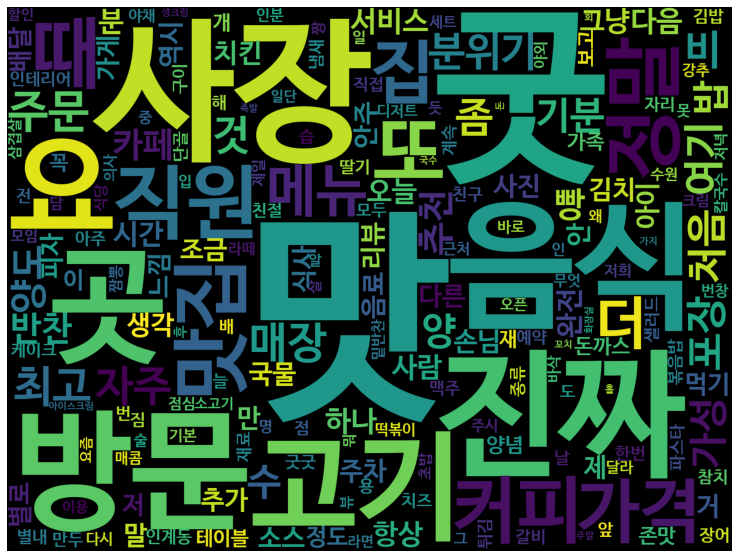

In [120]:
gen = wc.generate_from_frequencies(counts)
plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(gen)

In [121]:
# 현재 plt 파일 저장
plt.savefig('워드클라우드.png')

<Figure size 432x288 with 0 Axes>